In [2]:
# Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import string

In [3]:
import os
for dirname, _, filenames in os.walk('.\kaggle\input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

.\kaggle\input\sample_submission.csv
.\kaggle\input\test.csv
.\kaggle\input\train.csv


In [4]:
plt.rcParams.update({'font.size': 12})

# Load data
train_df = pd.read_csv("./kaggle/input/train.csv")
test_df = pd.read_csv("./kaggle/input/test.csv")
train = pd.read_csv("./kaggle/input/train.csv")
test = pd.read_csv("./kaggle/input/test.csv")
sub_sample = pd.read_csv("./kaggle/input/sample_submission.csv")

print (train.shape, test.shape, sub_sample.shape)

(7613, 5) (3263, 4) (3263, 2)


# EDA

In [5]:
train.head()

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1


In [6]:
train = train.drop_duplicates().reset_index(drop=True)
train.head()

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1


<Axes: xlabel='count', ylabel='target'>

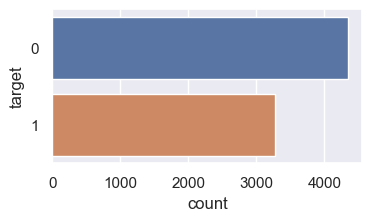

In [7]:
# Class balance
# train.target.value_counts()
sns.set(font_scale=1)
plt.figure(figsize=(4, 2))
sns.countplot(y=train.target)

In [8]:
train.isnull().sum()

id             0
keyword       61
location    2533
text           0
target         0
dtype: int64

In [9]:
test.isnull().sum()

id             0
keyword       26
location    1105
text           0
dtype: int64

#### Check number of unique keywords, and whether they are the same for train and test sets

In [10]:
print (train.keyword.nunique(), test.keyword.nunique())

221 221


#### Most common keywords

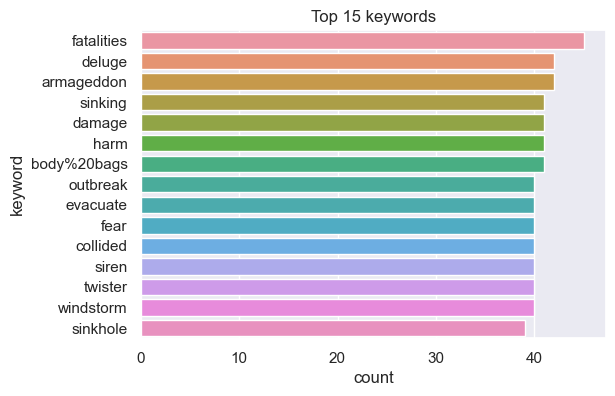

In [11]:
plt.figure(figsize=(6,4))
sns.set(font_scale=1)
sns.countplot(y=train.keyword, order = train.keyword.value_counts().iloc[:15].index)
plt.title('Top 15 keywords')
plt.show()

#### Top 10 words in disaster and non-disaster tweets

Both disaster and non-disaster keywords have negative words.

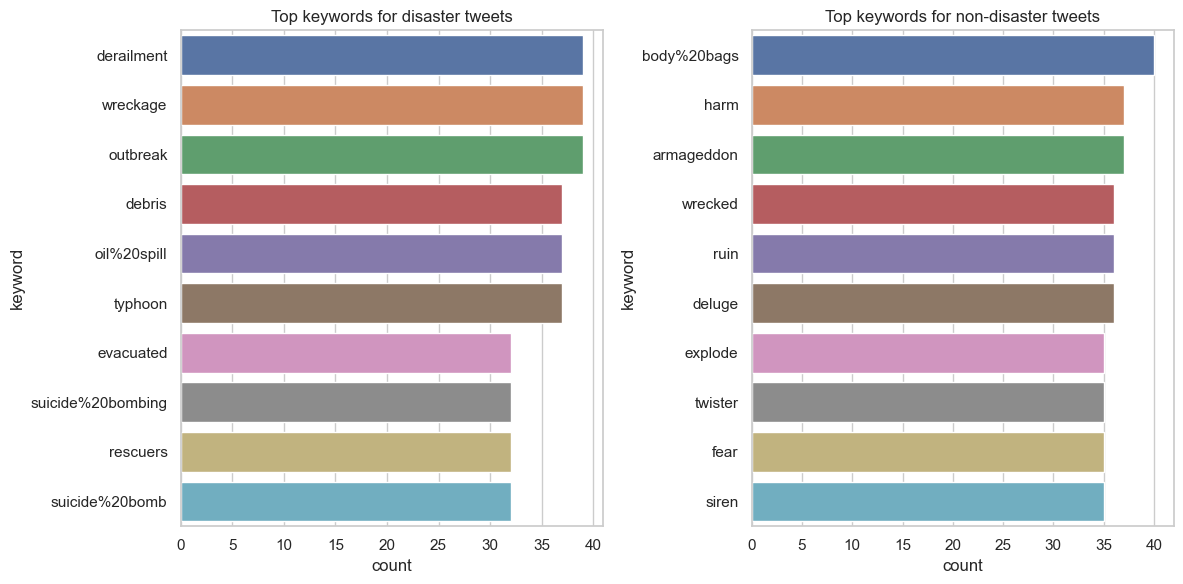

In [12]:
# Set the style to "whitegrid"
sns.set(style="whitegrid")

# Create a subplot grid with 1 row and 2 columns
fig, axes = plt.subplots(1, 2, figsize=(12, 6))  # Adjust the figure size as needed


# First countplot (Top keywords for disaster tweets)
sns.countplot(y=train[train.target == 1].keyword,
              order=train[train.target == 1].keyword.value_counts().iloc[:10].index,
              ax=axes[0])  # Place it in the first subplot

axes[0].set_title('Top keywords for disaster tweets')

# Second countplot (Top keywords for non-disaster tweets)
sns.countplot(y=train[train.target == 0].keyword,
              order=train[train.target == 0].keyword.value_counts().iloc[:10].index,
              ax=axes[1])  # Place it in the second subplot

axes[1].set_title('Top keywords for non-disaster tweets')

# Adjust layout and spacing
plt.tight_layout()

# Show the plots
plt.show()

In [13]:
# Check number of unique keywords and locations
print (train.location.nunique(), test.location.nunique())

3341 1602


### Top 15 locations

USA and United States should be the same; New York is part of USA; London is part of UK.

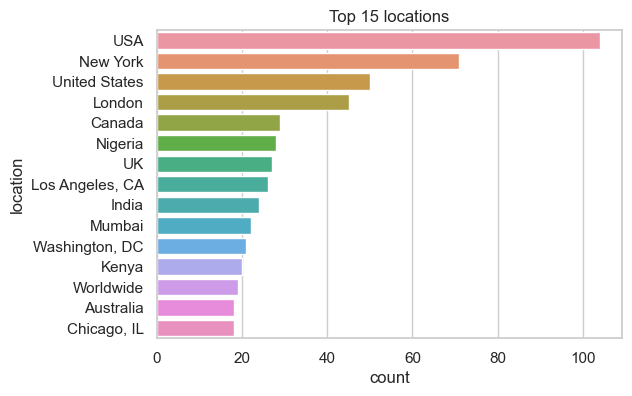

In [14]:
# Most common locations
plt.figure(figsize=(6,4))
sns.countplot(y=train.location, order = train.location.value_counts().iloc[:15].index)
plt.title('Top 15 locations')
plt.show()

### Top 15 locations in disaster tweet

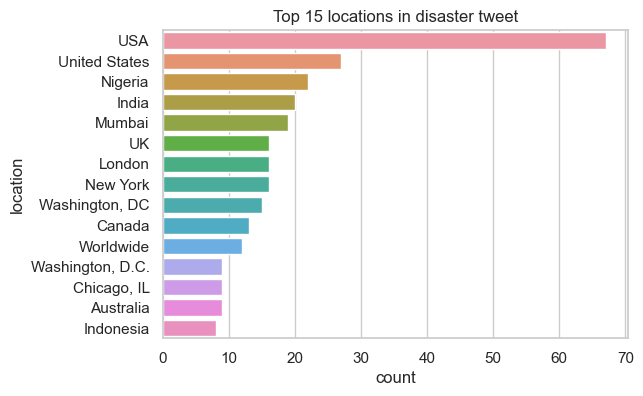

In [15]:
plt.figure(figsize=(6,4))
sns.countplot(y=train[train.target == 1].location, order = train[train.target == 1].location.value_counts().iloc[:15].index)
plt.title('Top 15 locations in disaster tweet')
plt.show()

### Cleaning the data and create features

In [16]:
import re
test_str = train.loc[417, 'text']
def clean_text(text):
    text = re.sub(r'https?://\S+', '', text) # Remove link
    text = re.sub(r'\n',' ', text)           # Remove line breaks
    text = re.sub('\s+', ' ', text).strip()  # Remove leading, trailing, and extra spaces
    return text

print("Original text: " + test_str)
print("Cleaned text: " + clean_text(test_str))

Original text: Arson suspect linked to 30 fires caught in Northern California http://t.co/mmGsyAHDzb
Cleaned text: Arson suspect linked to 30 fires caught in Northern California


In [17]:
def find_hashtags(tweet):
    return " ".join([match.group(0)[1:] for match in re.finditer(r"#\w+", tweet)]) or 'no'

def find_mentions(tweet):
    return " ".join([match.group(0)[1:] for match in re.finditer(r"@\w+", tweet)]) or 'no'

def find_links(tweet):
    return " ".join([match.group(0)[:] for match in re.finditer(r"https?://\S+", tweet)]) or 'no'

def process_text(df):
    
    df['text_clean'] = df['text'].apply(lambda x: clean_text(x))
    df['hashtags'] = df['text'].apply(lambda x: find_hashtags(x))
    df['mentions'] = df['text'].apply(lambda x: find_mentions(x))
    df['links'] = df['text'].apply(lambda x: find_links(x))
    # df['hashtags'].fillna(value='no', inplace=True)
    # df['mentions'].fillna(value='no', inplace=True)
    
    return df
    
train = process_text(train)
test = process_text(test)

In [18]:
train.head()

,id,keyword,location,text,target,text_clean,hashtags,mentions,links
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1,Our Deeds are the Reason of this #earthquake M...,earthquake,no,no
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1,Forest fire near La Ronge Sask. Canada,no,no,no
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1,All residents asked to 'shelter in place' are ...,no,no,no
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1,"13,000 people receive #wildfires evacuation or...",wildfires,no,no
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1,Just got sent this photo from Ruby #Alaska as ...,Alaska wildfires,no,no


In [19]:
from wordcloud import STOPWORDS

def create_stat(df):
    # Tweet length
    df['text_len'] = df['text_clean'].apply(len)
    # Word count
    df['word_count'] = df["text_clean"].apply(lambda x: len(str(x).split()))
    # Stopword count
    df['stop_word_count'] = df['text_clean'].apply(lambda x: len([w for w in str(x).lower().split() if w in STOPWORDS]))
    # Punctuation count
    df['punctuation_count'] = df['text_clean'].apply(lambda x: len([c for c in str(x) if c in string.punctuation]))
    # Count of hashtags (#)
    df['hashtag_count'] = df['hashtags'].apply(lambda x: len(str(x).split()))
    # Count of mentions (@)
    df['mention_count'] = df['mentions'].apply(lambda x: len(str(x).split()))
    # Count of links
    df['link_count'] = df['links'].apply(lambda x: len(str(x).split()))
    # Count of uppercase letters
    df['caps_count'] = df['text_clean'].apply(lambda x: sum(1 for c in str(x) if c.isupper()))
    # Ratio of uppercase letters
    df['caps_ratio'] = df['caps_count'] / df['text_len']
    return df

train = create_stat(train)
test = create_stat(test)

print(train.shape, test.shape)

(7613, 18) (3263, 17)


In [20]:
train.head()

,id,keyword,location,text,target,text_clean,hashtags,mentions,links,text_len,word_count,stop_word_count,punctuation_count,hashtag_count,mention_count,link_count,caps_count,caps_ratio
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1,Our Deeds are the Reason of this #earthquake M...,earthquake,no,no,69,13,6,1,1,1,1,10,0.144928
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1,Forest fire near La Ronge Sask. Canada,no,no,no,38,7,0,1,1,1,1,5,0.131579
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1,All residents asked to 'shelter in place' are ...,no,no,no,133,22,11,3,1,1,1,2,0.015038
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1,"13,000 people receive #wildfires evacuation or...",wildfires,no,no,64,8,1,2,1,1,1,1,0.015625
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1,Just got sent this photo from Ruby #Alaska as ...,Alaska wildfires,no,no,87,16,7,2,2,1,1,3,0.034483


In [21]:
train.corr(numeric_only=True)['target'].drop('target').sort_values()

stop_word_count     -0.111250
mention_count       -0.049654
caps_ratio          -0.014970
punctuation_count   -0.012535
word_count           0.017081
link_count           0.020244
caps_count           0.027808
hashtag_count        0.032853
id                   0.060781
text_len             0.096435
Name: target, dtype: float64

From above, we came to know all the statistics have very low co-relation

### Frequent tokens in text

In [22]:
from nltk import FreqDist, word_tokenize
from nltk.corpus import stopwords

In [23]:
# Make a set of stop words
stopwords = set(stopwords.words('english'))

1. Unigrams

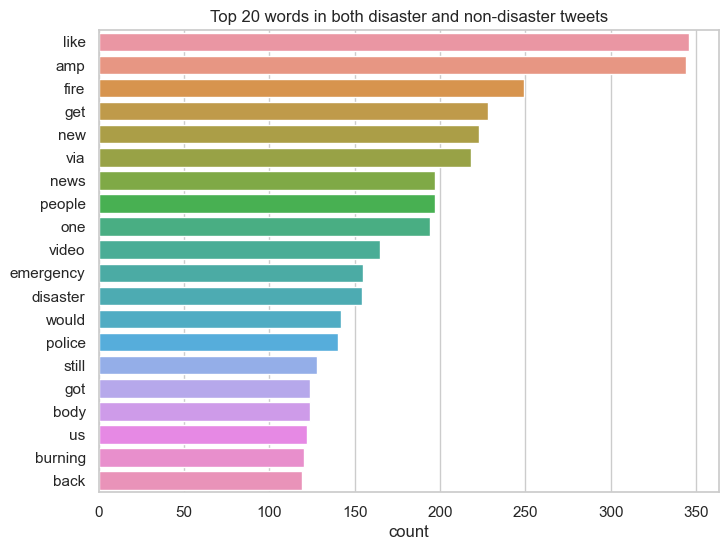

In [24]:
# Unigrams
word_freq = FreqDist(w for w in word_tokenize(' '.join(train['text_clean']).lower()) if 
                     (w not in stopwords) & (w.isalpha()))
df_word_freq = pd.DataFrame.from_dict(word_freq, orient='index', columns=['count'])
top20w = df_word_freq.sort_values('count',ascending=False).head(20)

plt.figure(figsize=(8,6))
sns.barplot(x='count', y=top20w.index, data=top20w)
plt.title('Top 20 words in both disaster and non-disaster tweets')
plt.show()

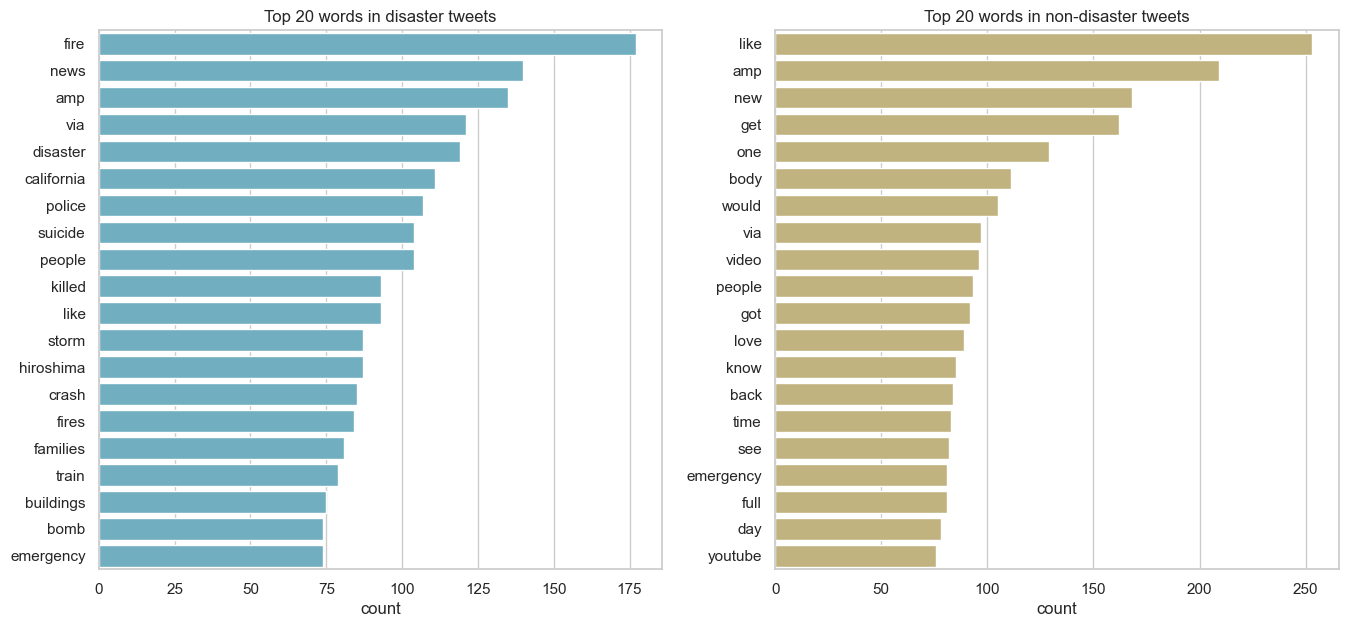

In [25]:
plt.figure(figsize=(16,7))
plt.subplot(121)
freq_d = FreqDist(w for w in word_tokenize(' '.join(train.loc[train.target==1, 'text_clean']).lower()) if 
                     (w not in stopwords) & (w.isalpha()))
df_d = pd.DataFrame.from_dict(freq_d, orient='index', columns=['count'])
top20_d = df_d.sort_values('count',ascending=False).head(20)
sns.barplot(x = 'count', y = top20_d.index, data = top20_d, color='c')
plt.title('Top 20 words in disaster tweets')
plt.subplot(122)
freq_nd = FreqDist(w for w in word_tokenize(' '.join(train.loc[train.target==0, 'text_clean']).lower()) if 
                     (w not in stopwords) & (w.isalpha()))
df_nd = pd.DataFrame.from_dict(freq_nd, orient='index', columns=['count'])
top20_nd = df_nd.sort_values('count',ascending=False).head(20)
sns.barplot(x = 'count', y = top20_nd.index, data = top20_nd, color='y')
plt.title('Top 20 words in non-disaster tweets')
plt.show()

2. Bigrams

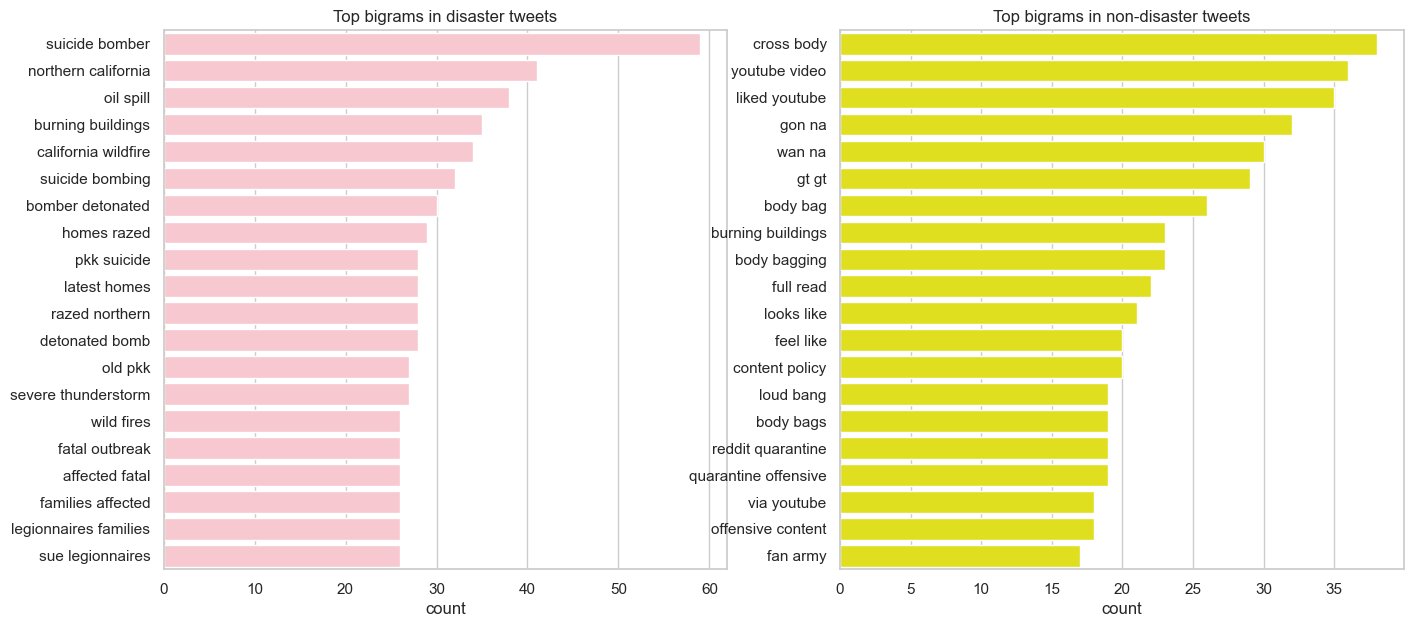

In [26]:
# Bigrams

from nltk import bigrams
plt.figure(figsize=(16,7))
plt.subplot(121)
bigram_d = list(bigrams([w for w in word_tokenize(' '.join(train.loc[train.target==1, 'text_clean']).lower()) if 
              (w not in stopwords) & (w.isalpha())]))
d_fq = FreqDist(bg for bg in bigram_d)
bgdf_d = pd.DataFrame.from_dict(d_fq, orient='index', columns=['count'])
bgdf_d.index = bgdf_d.index.map(lambda x: ' '.join(x))
bgdf_d = bgdf_d.sort_values('count',ascending=False)
top20_d_bi = bgdf_d.head(20)
sns.barplot(x = 'count', y = top20_d_bi.index, data = top20_d_bi, color='pink')
plt.title('Top bigrams in disaster tweets')


plt.subplot(122)
bigram_nd = list(bigrams([w for w in word_tokenize(' '.join(train.loc[train.target==0, 'text_clean']).lower()) if 
              (w not in stopwords) & (w.isalpha())]))
nd_fq = FreqDist(bg for bg in bigram_nd)
bgdf_nd = pd.DataFrame.from_dict(nd_fq, orient='index', columns=['count'])
bgdf_nd.index = bgdf_nd.index.map(lambda x: ' '.join(x))
bgdf_nd = bgdf_nd.sort_values('count',ascending=False)
top20_nd_bi = bgdf_nd.head(20)
sns.barplot(x = 'count', y = top20_nd_bi.index, data = top20_nd_bi, color='yellow')
plt.title('Top bigrams in non-disaster tweets')
plt.show()

# Encoding and Vectorizers

As part of feature generation, we will:

- Apply target encoding to keyword and location (cleaned)
- Count Vectorize cleaned text, links, hashtags and mentions columns


In [29]:
import category_encoders as ce

# Target encoding
features = ['keyword', 'location']
encoder = ce.TargetEncoder(cols=features)
encoder.fit(train[features],train['target'])

train = train.join(encoder.transform(train[features]).add_suffix('_target'))
test = test.join(encoder.transform(test[features]).add_suffix('_target'))

In [31]:
from sklearn.feature_extraction.text import CountVectorizer

# CountVectorizer

# Links
vec_links = CountVectorizer(min_df = 5, analyzer = 'word', token_pattern = r'https?://\S+') # Only include those >=5 occurrences
link_vec = vec_links.fit_transform(train['links'])
link_vec_test = vec_links.transform(test['links'])
X_train_link = pd.DataFrame(link_vec.toarray(), columns=vec_links.get_feature_names_out())
X_test_link = pd.DataFrame(link_vec_test.toarray(), columns=vec_links.get_feature_names_out())

# Mentions
vec_men = CountVectorizer(min_df = 5)
men_vec = vec_men.fit_transform(train['mentions'])
men_vec_test = vec_men.transform(test['mentions'])
X_train_men = pd.DataFrame(men_vec.toarray(), columns=vec_men.get_feature_names_out())
X_test_men = pd.DataFrame(men_vec_test.toarray(), columns=vec_men.get_feature_names_out())

# Hashtags
vec_hash = CountVectorizer(min_df = 5)
hash_vec = vec_hash.fit_transform(train['hashtags'])
hash_vec_test = vec_hash.transform(test['hashtags'])
X_train_hash = pd.DataFrame(hash_vec.toarray(), columns=vec_hash.get_feature_names_out())
X_test_hash = pd.DataFrame(hash_vec_test.toarray(), columns=vec_hash.get_feature_names_out())
print (X_train_link.shape, X_train_men.shape, X_train_hash.shape)

(7613, 6) (7613, 18) (7613, 107)


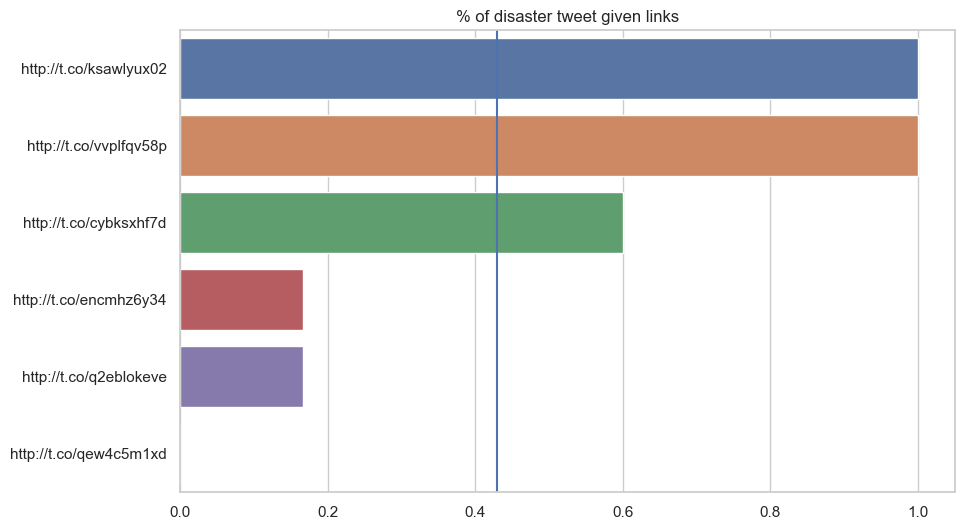

In [32]:
_ = (X_train_link.transpose().dot(train['target']) / X_train_link.sum(axis=0)).sort_values(ascending=False)
plt.figure(figsize=(10,6))
sns.barplot(x=_, y=_.index)
plt.axvline(np.mean(train.target))
plt.title('% of disaster tweet given links')
plt.show()

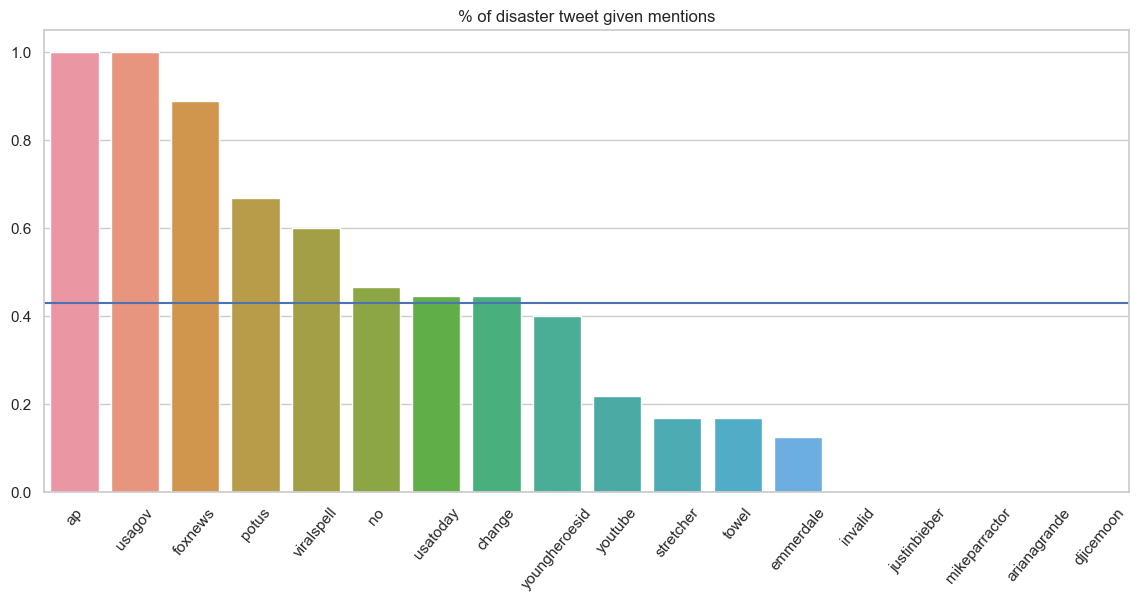

In [33]:
_ = (X_train_men.transpose().dot(train['target']) / X_train_men.sum(axis=0)).sort_values(ascending=False)
plt.figure(figsize=(14,6))
sns.barplot(x=_.index, y=_)
plt.axhline(np.mean(train.target))
plt.title('% of disaster tweet given mentions')
plt.xticks(rotation = 50)
plt.show()

In [34]:
hash_rank = (X_train_hash.transpose().dot(train['target']) / X_train_hash.sum(axis=0)).sort_values(ascending=False)
print('Hashtags with which 100% of Tweets are disasters: ')
print(list(hash_rank[hash_rank==1].index))
print('Total: ' + str(len(hash_rank[hash_rank==1])))
print('Hashtags with which 0% of Tweets are disasters: ')
print(list(hash_rank[hash_rank==0].index))
print('Total: ' + str(len(hash_rank[hash_rank==0])))

Hashtags with which 100% of Tweets are disasters: 
['abstorm', 'earthquake', 'hiroshima', 'india', 'japan', 'libya', 'africa', 'mumbai', 'myanmar', 'newyork', 'okwx', 'rohingya', 'science', 'sittwe', 'socialnews', 'wildfire', 'wildfires', 'worldnews', 'wx', 'hailstorm', 'mh370', 'yyc', 'disaster', 'breaking', 'bestnaijamade', 'antioch']
Total: 26
Hashtags with which 0% of Tweets are disasters: 
['dubstep', 'edm', 'animalrescue', 'fashion', 'technology', 'dance', 'trapmusic', 'ices', 'np', 'job', 'jobs', 'summerfate', 'kindle', 'soundcloud', 'military', 'bb17', 'beyhive', 'dnb']
Total: 18


In [36]:
# Tf-idf for text
from sklearn.feature_extraction.text import TfidfVectorizer

vec_text = TfidfVectorizer(min_df = 10, ngram_range = (1,2), stop_words='english') 
# Only include >=10 occurrences
# Have unigrams and bigrams
text_vec = vec_text.fit_transform(train['text_clean'])
text_vec_test = vec_text.transform(test['text_clean'])
X_train_text = pd.DataFrame(text_vec.toarray(), columns=vec_text.get_feature_names_out())
X_test_text = pd.DataFrame(text_vec_test.toarray(), columns=vec_text.get_feature_names_out())
print (X_train_text.shape)

(7613, 1691)


In [37]:
# Joining the dataframes together

train = train.join(X_train_link, rsuffix='_link')
train = train.join(X_train_men, rsuffix='_mention')
train = train.join(X_train_hash, rsuffix='_hashtag')
train = train.join(X_train_text, rsuffix='_text')
test = test.join(X_test_link, rsuffix='_link')
test = test.join(X_test_men, rsuffix='_mention')
test = test.join(X_test_hash, rsuffix='_hashtag')
test = test.join(X_test_text, rsuffix='_text')
print (train.shape, test.shape)

(7613, 1842) (3263, 1841)


## Logistic Regression

In [51]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LogisticRegressionCV
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import make_scorer, f1_score,confusion_matrix
from sklearn.preprocessing import MinMaxScaler


features_to_drop = ['id', 'keyword','location','text','location','text_clean', 'hashtags', 'mentions','links']
scaler = MinMaxScaler()

X_train = train.drop(columns = features_to_drop + ['target'])
X_test = test.drop(columns = features_to_drop)
y_train = train.target

# Define the F1 scorer
f1_scorer = make_scorer(f1_score, average='binary')

# Create a pipeline with a MinMaxScaler() and a Logistic Regression classifier
lr = LogisticRegressionCV(cv=3, random_state=777, scoring = f1_scorer, solver='liblinear') # Other solvers have failure to converge problem


pipeline = Pipeline([
    ('scaler', scaler),
    ('classifier', lr)
])


# Fit the model on the training data
pipeline.fit(X_train, y_train)

# Predict on the training data
y_train_pred = clf.predict(X_train)

# Calculate the F1 score on the training data
f1_train = f1_score(y_train, y_train_pred, average='micro')
# Print the F1 scores
print("F1 Score on Training Data:", f1_train)

# Confusion matrix
pd.DataFrame(confusion_matrix(y_train, y_train_pred))

F1 Score on Training Data: 0.8887429397083936


,0,1
0,4039,303
1,544,2727


In [50]:
#create submission file
y_test = pipeline.predict(X_test)
submit = sub_sample.copy()
submit.target = y_test
submit.to_csv('./submission/submit_lr.csv',index=False)